<a href="https://colab.research.google.com/github/AleksandraKochneva/A-B-test/blob/main/A_B_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
test_group = pd.read_csv('/content/drive/MyDrive/test_group.csv',delimiter=';')
control_group = pd.read_csv('/content/drive/MyDrive/control_group.csv',delimiter=';')
new_columns_names = ['campaign', 'date', 'spend', 'impressions', 'reach','clicks', 'searches', 'view_content', 'add_to_cart', 'purchase']
df = pd.concat([test_group,control_group],axis=0,ignore_index=True)
df.columns = new_columns_names

#Variables description

**campaign** - campaign name,

**date** - date of observation,

**spend** - amount of USD spent on campaign,

**impressions** - the number of times an ad is displayed,

**reach** - the number of unique people who saw an ad,

**clicks** - the number of clicks on ad links directed to Advertiser’s website

**searches** - the number of searches

**view_content** - the number of views of content

**add_to_cart** - the number of adding to cart

**purchase** - the number of purchases


# Table view

In [4]:
df.head()

,campaign,date,spend,impressions,reach,clicks,searches,view_content,add_to_cart,purchase
0,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
1,Test Campaign,2.08.2019,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
2,Test Campaign,3.08.2019,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0
3,Test Campaign,4.08.2019,2710,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0
4,Test Campaign,5.08.2019,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0


In [5]:
size = df.shape
print(f'The table has {size[0]} rows and {size[1]} columns')

The table has 60 rows and 10 columns


In [6]:
campaigns_list = df.campaign.unique()
print(f'There are {len(campaigns_list)} campaigns:')
for c in campaigns_list:
  print(f'Campaign {c}: {df[df.campaign==c].shape[0]} observations')

There are 2 campaigns:
Campaign Test Campaign: 30 observations
Campaign Control Campaign: 30 observations


# Missing data detection

In [7]:
df[df.isna().any(axis=1)]

,campaign,date,spend,impressions,reach,clicks,searches,view_content,add_to_cart,purchase
34,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Missing data handling

Since only one date data is missing we will just ignore it

In [8]:
na_date = df[df.isna().any(axis=1)].date.values[0]
df_cleaned = df[df.date!=na_date]
missing_values = df_cleaned.isna().sum()
missing_values_df = missing_values.reset_index()  # Convert the Series to DataFrame
missing_values_df.columns = ['Column Name', 'Missing Values']
missing_values_df

,Column Name,Missing Values
0,campaign,0
1,date,0
2,spend,0
3,impressions,0
4,reach,0
5,clicks,0
6,searches,0
7,view_content,0
8,add_to_cart,0
9,purchase,0


# Visualising data

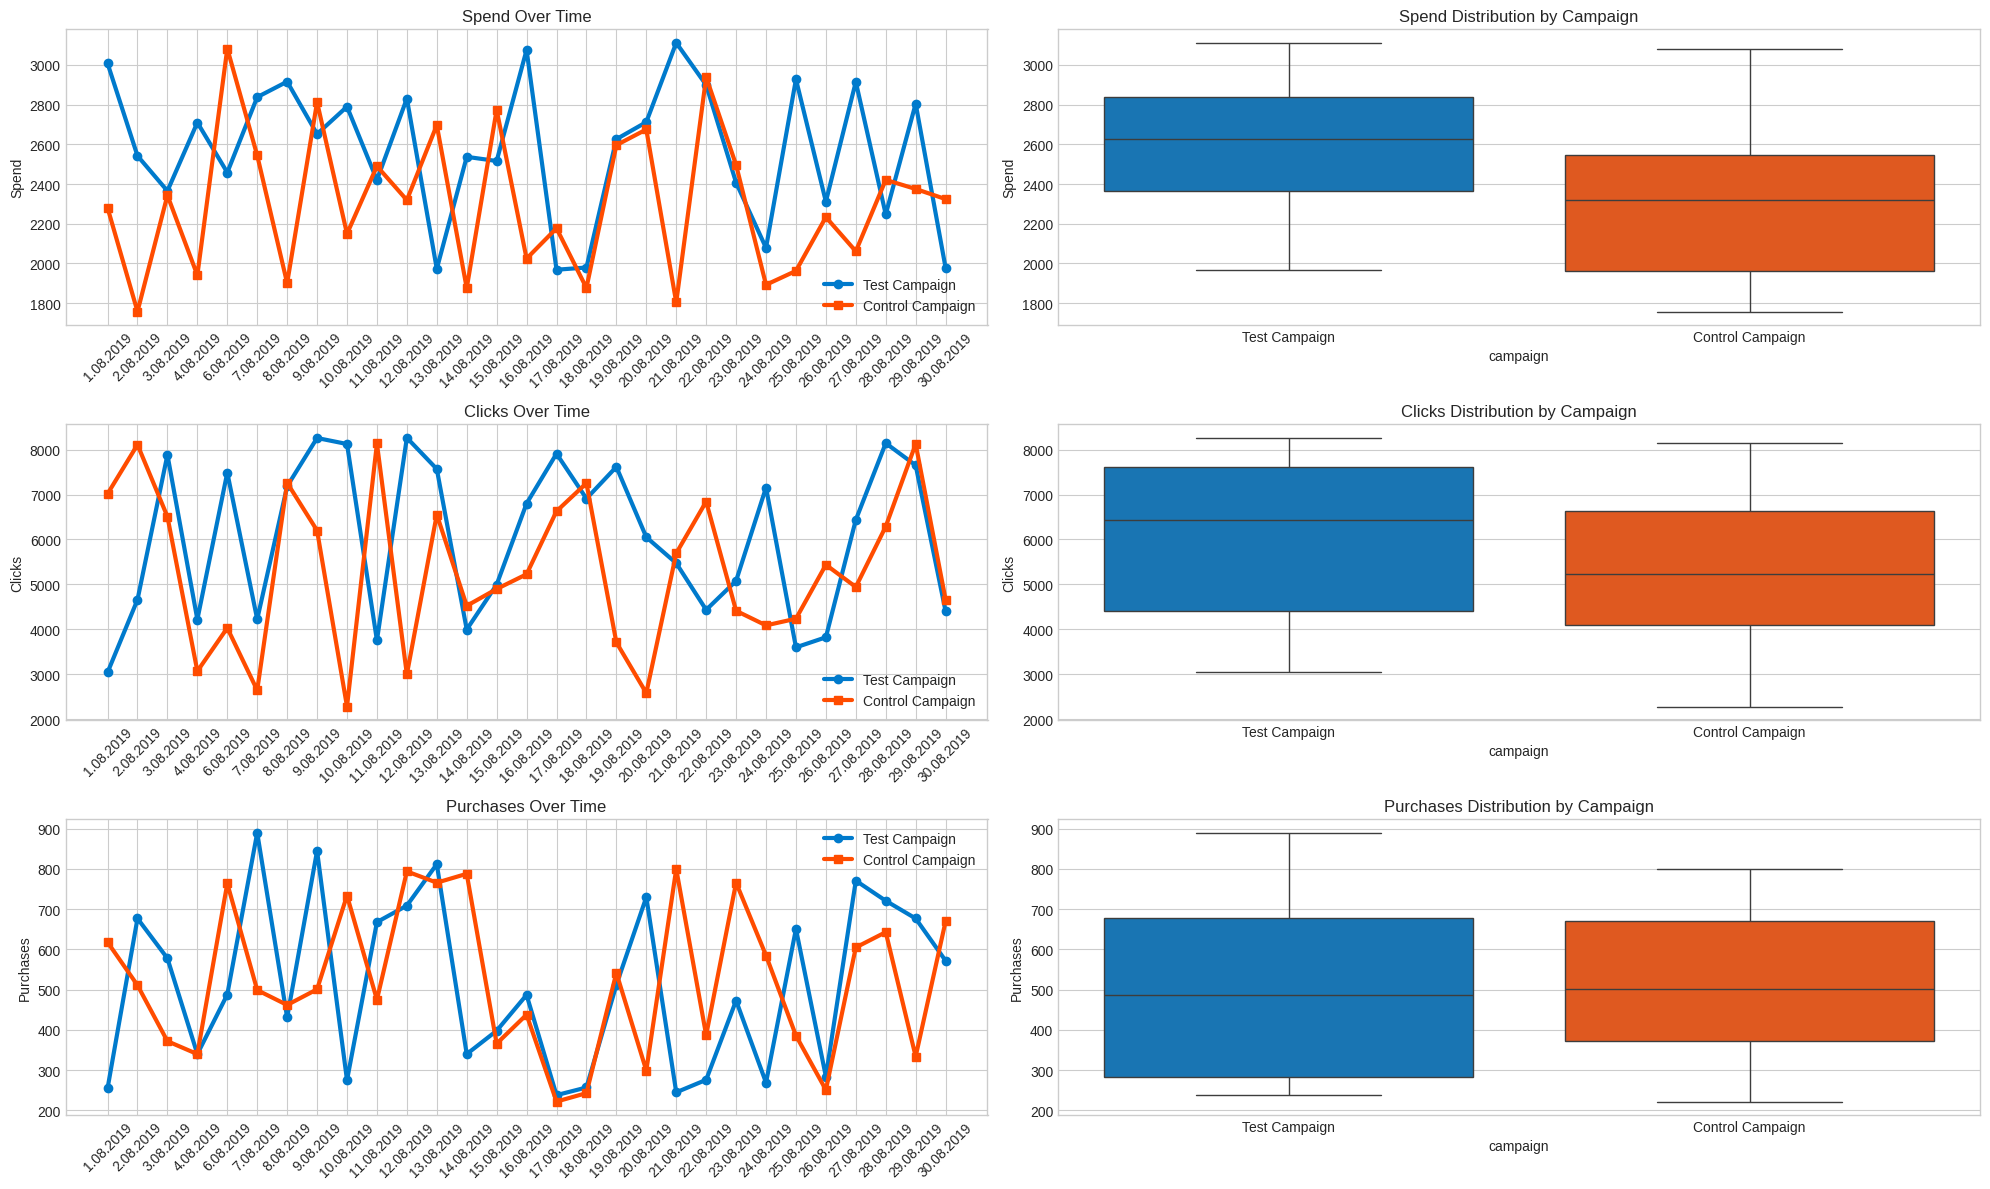

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data
df_test = df_cleaned[df_cleaned['campaign'] == 'Test Campaign']
df_control = df_cleaned[df_cleaned['campaign'] == 'Control Campaign']

# Dates and indices for the x-axis
dates = df_test['date']

# Create subplots with a 3x2 grid
fig, ax = plt.subplots(3, 2, figsize=(20, 12))

# Customizing color palette
test_color = '#007acc'
control_color = '#ff4c00'

# Spend plot
ax[0, 0].plot(dates, df_test['spend'], color=test_color, linestyle='-',
             linewidth=3, marker='o', markersize=6, label='Test Campaign')
ax[0, 0].plot(dates, df_control['spend'], color=control_color, linestyle='-',
             linewidth=3, marker='s', markersize=6, label='Control Campaign')
ax[0, 0].set_title('Spend Over Time')
ax[0, 0].set_ylabel('Spend')
ax[0, 0].tick_params(axis='x', rotation=45)
ax[0, 0].legend()
ax[0, 0].grid(True)

# Clicks plot
ax[1, 0].plot(dates, df_test['clicks'], color=test_color, linestyle='-',
             linewidth=3, marker='o', markersize=6, label='Test Campaign')
ax[1, 0].plot(dates, df_control['clicks'], color=control_color, linestyle='-',
             linewidth=3, marker='s', markersize=6, label='Control Campaign')
ax[1, 0].set_title('Clicks Over Time')
ax[1, 0].set_ylabel('Clicks')
ax[1, 0].tick_params(axis='x', rotation=45)
ax[1, 0].legend()
ax[1, 0].grid(True)

# Purchase plot
ax[2, 0].plot(dates, df_test['purchase'], color=test_color, linestyle='-',
             linewidth=3, marker='o', markersize=6, label='Test Campaign')
ax[2, 0].plot(dates, df_control['purchase'], color=control_color, linestyle='-',
             linewidth=3, marker='s', markersize=6, label='Control Campaign')
ax[2, 0].set_title('Purchases Over Time')
ax[2, 0].set_ylabel('Purchases')
ax[2, 0].tick_params(axis='x', rotation=45)
ax[2, 0].legend()
ax[2, 0].grid(True)

# Boxplot for Spend
sns.boxplot(x='campaign', y='spend', hue='campaign', data=df_cleaned,
            ax=ax[0, 1], palette={'Test Campaign': test_color, 'Control Campaign': control_color}, legend=False)
ax[0, 1].set_title('Spend Distribution by Campaign')
ax[0, 1].set_ylabel('Spend')

# Boxplot for Clicks
sns.boxplot(x='campaign', y='clicks', hue='campaign', data=df_cleaned,
            ax=ax[1, 1], palette={'Test Campaign': test_color, 'Control Campaign': control_color}, legend=False)
ax[1, 1].set_title('Clicks Distribution by Campaign')
ax[1, 1].set_ylabel('Clicks')

# Boxplot for Purchases
sns.boxplot(x='campaign', y='purchase', hue='campaign', data=df_cleaned,
            ax=ax[2, 1], palette={'Test Campaign': test_color, 'Control Campaign': control_color}, legend=False)
ax[2, 1].set_title('Purchases Distribution by Campaign')
ax[2, 1].set_ylabel('Purchases')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


# A/B test (t-test)

In [14]:
df_cleaned.groupby(['campaign']).sum().drop('date',axis=1)

,spend,impressions,reach,clicks,searches,view_content,add_to_cart,purchase
campaign,,,,,,,,
Control Campaign,66818,3177233.0,2576503.0,154303.0,64418.0,56370.0,37700.0,15161.0
Test Campaign,74595,2123249.0,1509609.0,175107.0,70463.0,54882.0,25490.0,14869.0



In digital marketing, CTR, CR, and CPA are important performance metrics used to measure the effectiveness of campaigns

CTR - Click-Through Rate. The percentage of people who clicked on an ad or link after seeing it.

CR - Conversion Rate. The percentage of users who purchased after clicking an ad.

CPA - Cost Per Acquisition. The cost of acquiring one customer or making one purchase.


In [15]:
def calculate_metrics(df):
    df["CTR"] = df["clicks"] / df["impressions"] * 100
    df["CR"] = df["purchase"] / df["clicks"] * 100
    df["CPA"] = df["spend"] / df["purchase"]
    return df

metrics = df_cleaned.groupby("campaign").agg({
    "impressions": "sum",
    "clicks": "sum",
    "purchase": "sum",
    "spend": "sum"
}).apply(calculate_metrics, axis=1)

metrics


,impressions,clicks,purchase,spend,CTR,CR,CPA
campaign,,,,,,,
Control Campaign,3177233.0,154303.0,15161.0,66818.0,4.856521,9.825473,4.407229
Test Campaign,2123249.0,175107.0,14869.0,74595.0,8.247125,8.491380,5.016814


A t-test is a statistical test used to determine whether there is a significant difference between the means of two groups or between a sample mean and a known value. It helps in assessing whether the observed differences are due to chance or if they reflect a true effect or relationship.


A t-test formula for two independent samples to calculate the t-statistic:
$$
t = \frac{\bar{X}_A - \bar{X}_B}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}
$$

- $\mu_A$ and $\mu_B$ be the sample means of Campaign A and Campaign B, respectively.
- $s_A^2$ and $s_B^2$ be the variances of Campaign A and Campaign B, respectively.
- $n_A$ and $n_B$ be the sample sizes of Campaign A and Campaign B, respectively.

The degrees of freedom for this t-test are:
$$
df = n_A + n_B - 2
$$

P-value we get from t-distribution

In [16]:
campaign_a = df_cleaned[df_cleaned["campaign"] == "Control Campaign"]
campaign_b = df_cleaned[df_cleaned["campaign"] == "Test Campaign"]

# Perform t-test for CTR
ctr_a = campaign_a["clicks"] / campaign_a["impressions"]
ctr_b = campaign_b["clicks"] / campaign_b["impressions"]
t_stat_ctr, p_val_ctr = stats.ttest_ind(ctr_a, ctr_b)

# Perform t-test for Conversion Rate
conv_rate_a = campaign_a["purchase"] / campaign_a["clicks"]
conv_rate_b = campaign_b["purchase"] / campaign_b["clicks"]
t_stat_conv, p_val_conv = stats.ttest_ind(conv_rate_a, conv_rate_b)


print(f"Mean CTR for Control campaign: {ctr_a.mean()}")
print(f"Mean CTR for Test campaign: {ctr_b.mean()}")
print()
print(f"Mean Conversion Rate for Control campaign: {conv_rate_a.mean()}")
print(f"Mean Conversion Rate for Test campaign: {conv_rate_b.mean()}")
print()
print(f"CTR t-test: t-statistic = {t_stat_ctr}, p-value = {p_val_ctr}")
print(f"Conversion Rate t-test: t-statistic = {t_stat_conv}, p-value = {p_val_conv}")


Mean CTR for Control campaign: 0.05095870900557932
Mean CTR for Test campaign: 0.1041855451967498

Mean Conversion Rate for Control campaign: 0.11477203226762732
Mean Conversion Rate for Test campaign: 0.0909780534733044

CTR t-test: t-statistic = -4.024667930462874, p-value = 0.0001730134106270996
Conversion Rate t-test: t-statistic = 1.5688157013498611, p-value = 0.12232465596172483


# Conclusion
Since the p-value for the CTR t-test is 0.00017, which is much lower than the significance level of 0.05, we can reject the null hypothesis. This means there is a statistically significant difference in the CTR between the Control and Test campaigns. Specifically, the Test campaign has a significantly higher CTR than the Control campaign, suggesting that the Test campaign is more effective at generating clicks.

The p-value for the Conversion Rate t-test is 0.12232, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is no statistically significant difference in the Conversion Rate between the Control and Test campaigns. Although the Control campaign has a slightly higher Conversion Rate, the difference is not statistically significant and could be due to random variation.